# Bank Customer Churn Prediction

### Load and Get Basic Dataset Info

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("Number of Rows:", df.shape[0], "\nNumber of Columns:", df.shape[1])

Number of Rows: 10000 
Number of Columns: 14


Let's trash a few variables that will not be needed

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [6]:
print("New Number of Rows:", df.shape[0], "\nNew Number of Columns:", df.shape[1])

New Number of Rows: 10000 
New Number of Columns: 11


In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Let's separate numerical and categorical variables for ease of visualizations

In [9]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include='object')

Let's view value counts for categorical variables

In [10]:
for col in categorical_df:
    print(f"Column: {col}")
    print(categorical_df[col].value_counts())
    print("\n")

Column: Geography
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


Column: Gender
Gender
Male      5457
Female    4543
Name: count, dtype: int64




#### Check for Null Values

In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Visualize Numerical data with box plots

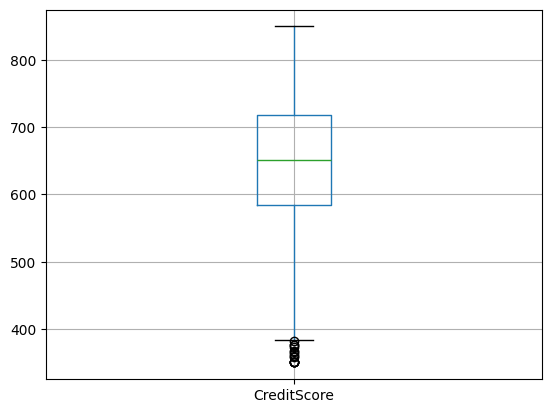

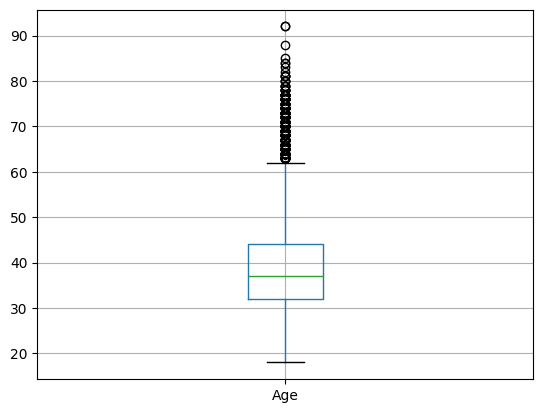

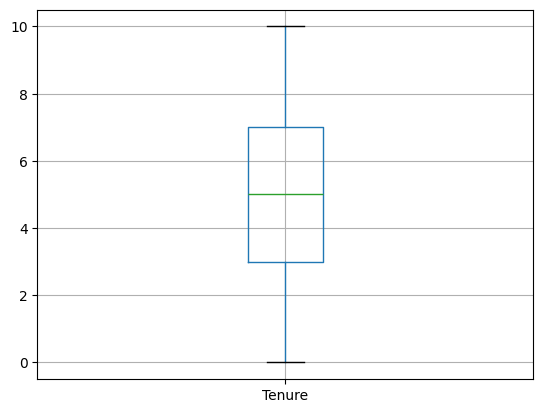

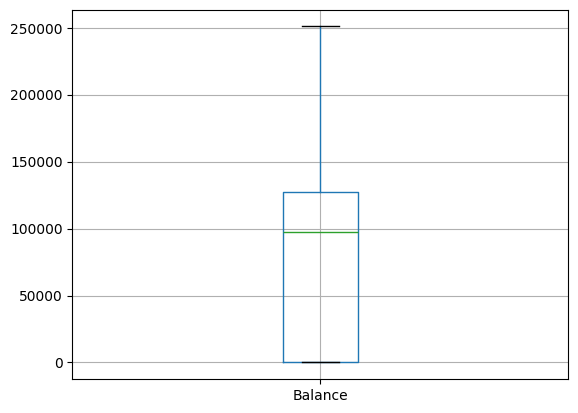

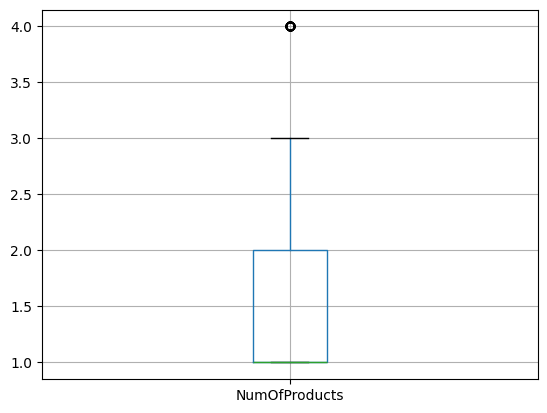

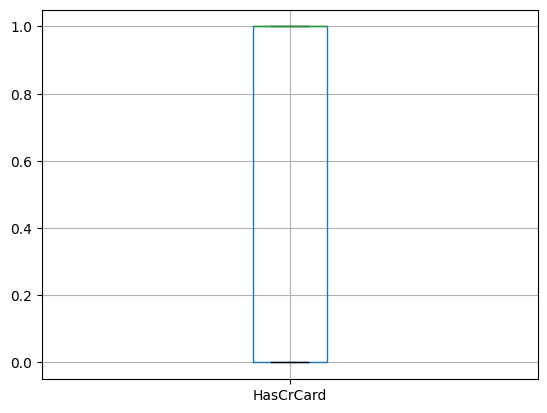

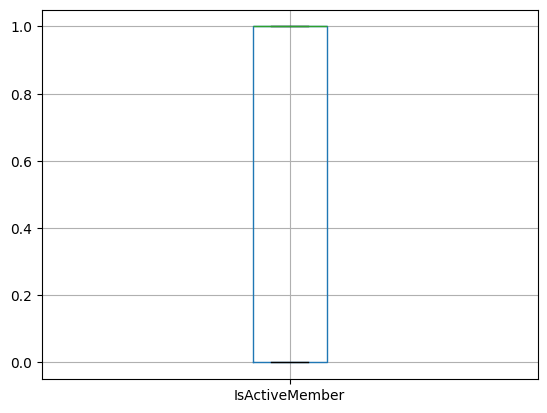

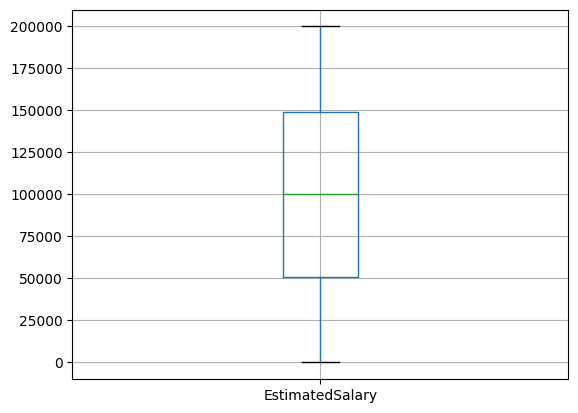

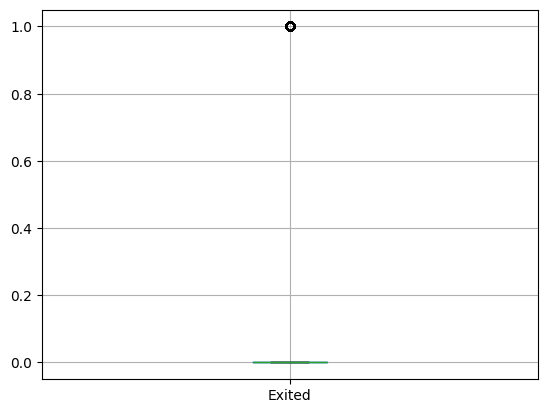

In [14]:
for col in numeric_df:
    df.boxplot(column=col)
    plt.show()

#### Visualize continuous data with hist plots

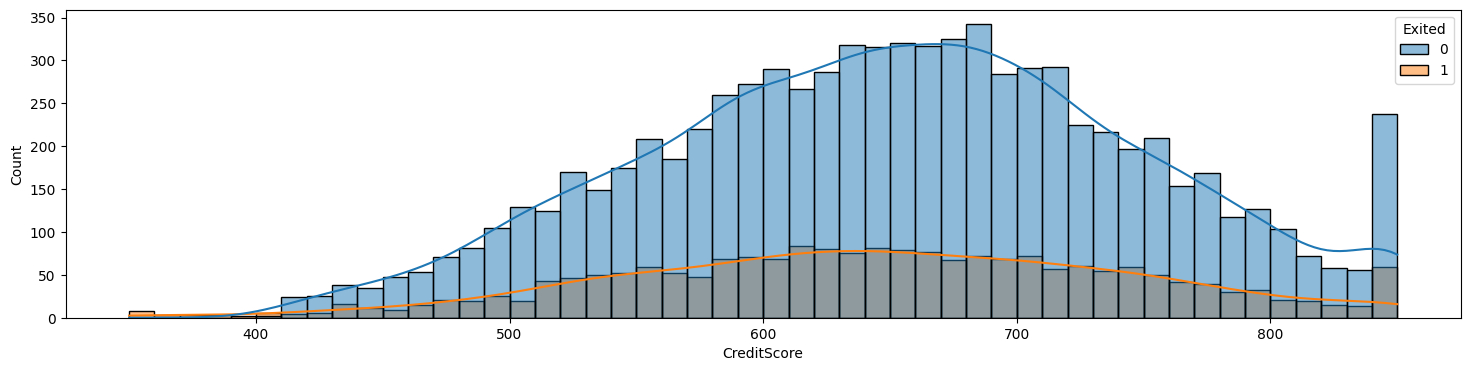

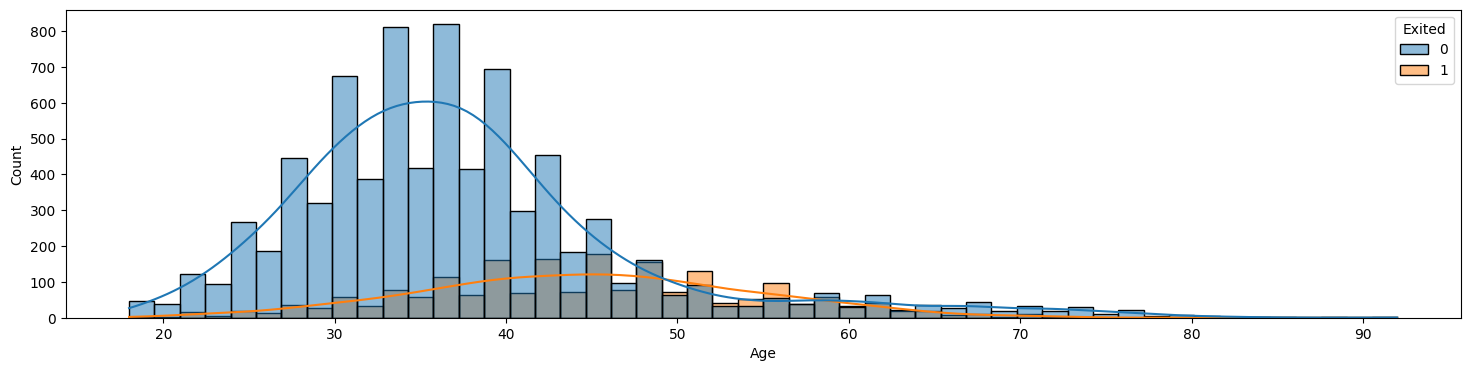

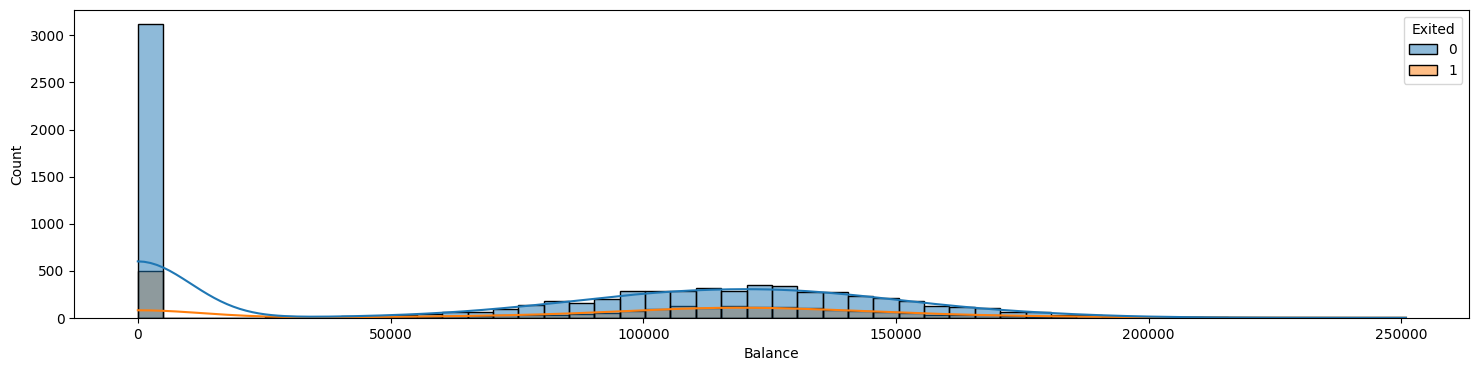

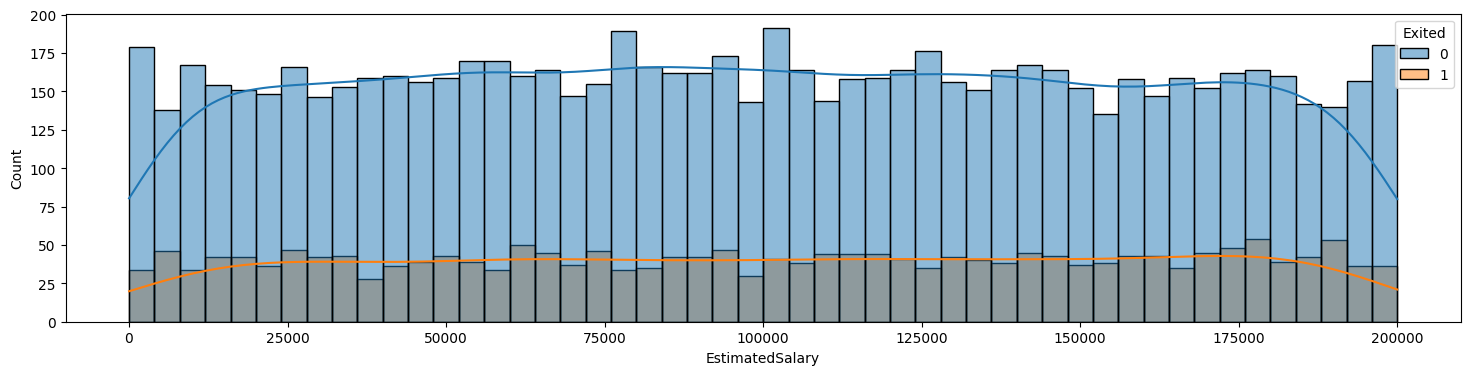

In [15]:
continuous = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for var in continuous:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=df, x=var, hue="Exited", bins=50, kde=True)
    plt.show()

#### Visualize Categorical Data

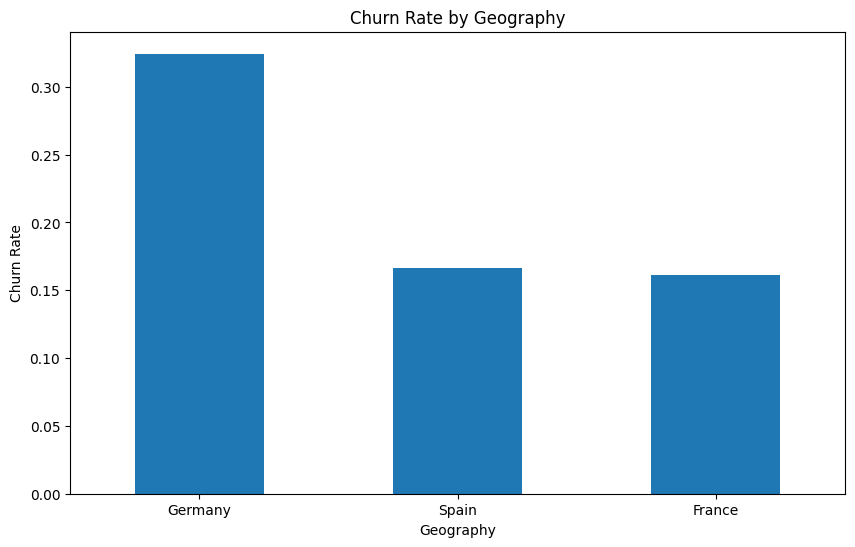

In [16]:
plt.figure(figsize=(10,6))
df.groupby('Geography')['Exited'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

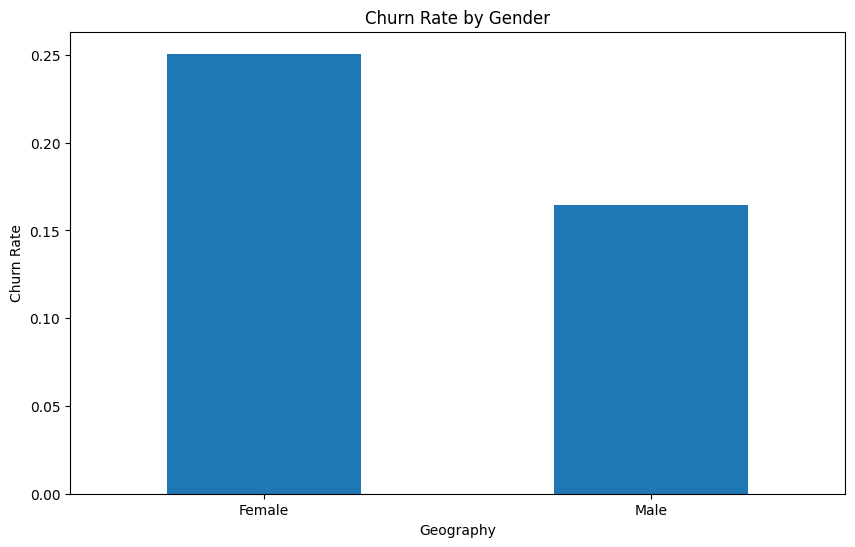

In [17]:
plt.figure(figsize=(10,6))
df.groupby('Gender')['Exited'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Churn Rate by Gender')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

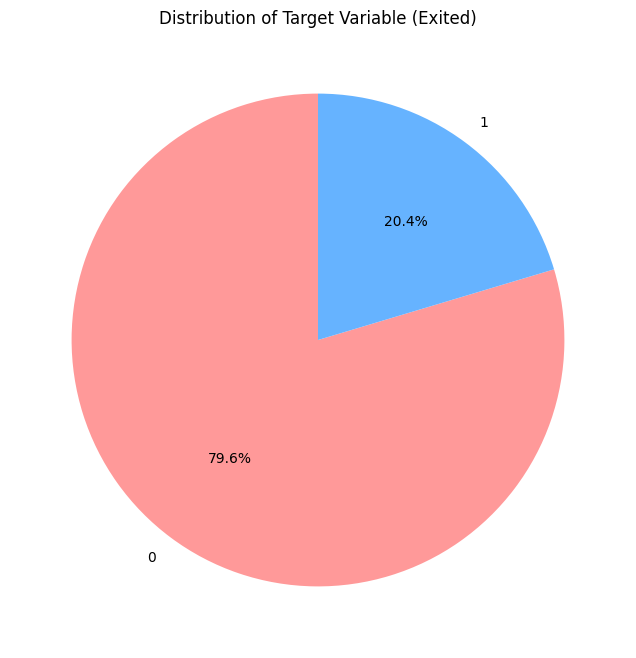

In [18]:
plt.figure(figsize=(8, 8))
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Target Variable (Exited)')
plt.ylabel('')
plt.show()